<a href="https://colab.research.google.com/github/766O/Baseballdata_MLproject/blob/main/KBO_%ED%83%80%EC%9E%90_%ED%99%88%EB%9F%B0%EC%98%88%EC%B8%A1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,690 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129499 files and di

#**EDA & Feature Engineering**

In [107]:
X = pd.DataFrame(pd.read_csv('2016-2021_data.csv',engine='python',encoding='CP949'))
Y = pd.DataFrame(pd.read_csv('2022_data.csv',engine='python',encoding='CP949'))

X.head()
Y.head()

,Year,선수명,팀명,AVG,G,PA,AB,R,H,2B,...,XBH,GO,AO,GO/AO,GW RBI,BB/K,P/PA,ISOP,XR,GPA
0,2022,이정후,키움,0.349,142,627,553,85,193,36,...,69,154,177,0.87,15,2.06,3.69,0.226,120.2,0.333
1,2022,피렐라,삼성,0.342,141,630,561,102,192,33,...,65,149,141,1.06,12,0.68,3.45,0.223,114.4,0.326
2,2022,박건우,NC,0.336,111,463,408,52,137,18,...,29,100,112,0.89,7,0.71,3.87,0.123,72.1,0.298
3,2022,이대호,롯데,0.331,142,591,540,53,179,23,...,46,150,161,0.93,9,0.77,3.58,0.170,90.5,0.296
4,2022,나성범,KIA,0.320,144,649,563,92,180,39,...,62,117,134,0.87,9,0.47,3.75,0.188,110.9,0.308


In [108]:
#홈런개수 분석시 불필요한 데이터 제외 

X=X.drop(['선수명','팀명','Year'],axis=1)
X.head()


,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,XBH,GO,AO,GO/AO,GW RBI,BB/K,P/PA,ISOP,XR,GPA
0,0.376,138,618,519,99,195,46,2,31,338,...,79,108,140,0.77,9,1.00,3.94,0.276,136.4,0.372
1,0.365,144,652,529,94,193,39,0,23,301,...,62,113,132,0.86,11,1.11,4.25,0.204,132.9,0.356
2,0.352,113,530,452,98,159,20,4,3,196,...,27,139,126,1.10,1,2.17,4.13,0.082,84.3,0.306
3,0.346,130,555,511,97,177,37,3,23,289,...,63,137,135,1.01,12,0.44,3.56,0.219,98.6,0.315
4,0.346,138,578,509,84,176,24,0,11,233,...,35,145,124,1.17,10,0.82,3.89,0.112,90.7,0.300


In [109]:
#예측때 사용위한 선수명 데이터 프레임
player_id=Y['선수명']

In [110]:
#홈런개수 와 상관계수가 0.4이상인 컬럼들 확인
corr=X.corr()
corr_columns=corr.index[abs(corr['HR'])>=0.4]
corr_columns

Index(['HR', 'TB', 'RBI', 'SAC', 'XBH', 'GO', 'GO/AO', 'GW RBI', 'ISOP', 'XR',
       'GPA'],
      dtype='object')

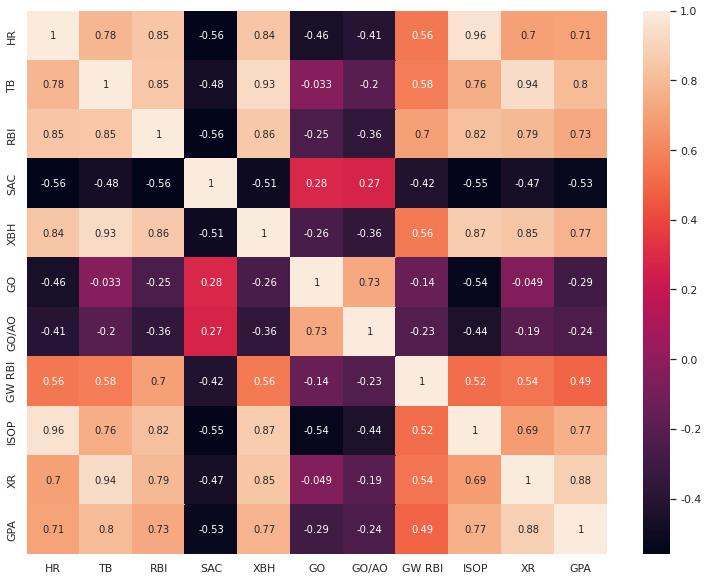

In [111]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothic')
import seaborn as sns
plt.figure(figsize=(13,10))
heatmap=sns.heatmap(X[corr_columns].corr(),annot=True)

In [112]:


#칼럼 하나씩 살펴보고 이상치 제거 / 제외할 칼럼 선정 (Outlier remove)

#pitchers=X[['AVG','G','R','2B','HR','RBI','SAC','SF','XBH','GO/AO','GW RBI','BB/K','P/PA','ISOP']]
pitchers=X[['AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SAC',
       'SF', 'XBH', 'GO', 'AO', 'GO/AO', 'GW RBI', 'BB/K', 'P/PA', 'ISOP',
       'XR', 'GPA']]
def plot_scatter_each_columns(df):
  plt.rcParams['figure.figsize']=[20,16]
  fig=plt.figure()
  for i in range(len(df.columns)):
    ax=fig.add_subplot(5,5,i+1)
   # print(df.columns[i])
    #print(df[df.columns[i]])
    plt.scatter(df[df.columns[i]],df['HR'])
    #plt.xlabel(df.columns[i])
    plt.ylabel('HR')
    ax.set_title(df.columns[i])
  plt.show()


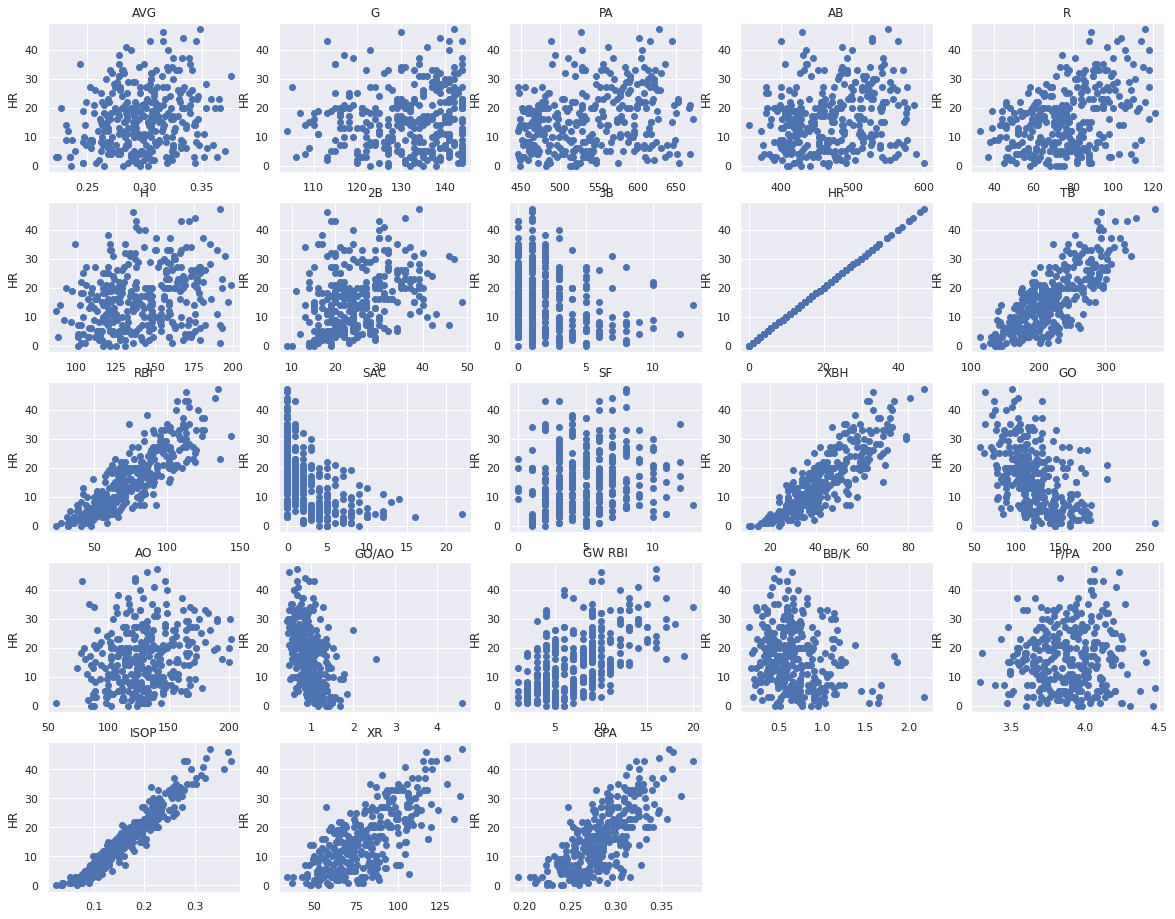

In [113]:
plot_scatter_each_columns(pitchers)

In [114]:
#강한상관관계 가지는 컬럼들 => TB ,RBI, XBH, ISOP, GPA, XR 

In [115]:
# 상관계수가 높은 변수들을 사용하면 다중공산성이 높아 문제를 일으킬 가능성이 높다
#VIF 확인 -> 다른독립변수에 의존하는 변수 삭제
#VIF 수치 높은 컬럼들 삭제해가면서 VIF가 변하는 모습 살펴보기
#충분히 수치가 낮아지면 해당 컬럼 사용

In [116]:
#AB 타수 PA 타석  TB 루타  RBI 타점 SF 희플  GO/AO 땅볼/플라이 비율 GO 땅볼 AO 플라이 GW RBI 결승타 P/PA투구수/타석수 
#XR 득점기여도 SAC 희생타 BB/K 볼삼비 GPA 출루율가중 ops XBH 장타개수
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_X=X
vif_X=X.drop(['AVG','G','PA','AB','H','3B','SAC','SF','AO','GO','BB/K','P/PA'],axis=1)

vif=pd.DataFrame()
vif['VIF Factor']=[float(variance_inflation_factor(vif_X.values,i))for i in range(vif_X.shape[1])]
vif['features']=vif_X.columns
vif.sort_values('VIF Factor')
vif

,VIF Factor,features
0,74.543291,R
1,316.563817,2B
2,123.560482,HR
3,893.800668,TB
4,83.711944,RBI
5,1905.717694,XBH
6,12.878310,GO/AO
7,9.840790,GW RBI
8,607.766830,ISOP
9,202.106561,XR


In [117]:
#분석 컬럼 결정
X=X.drop(['AVG','G','PA','AB','H','3B','SAC','SF','AO','GO','BB/K','P/PA'],axis=1)

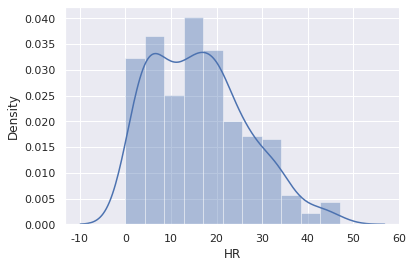

In [118]:
#타겟 데이터 확인

sns.set()
%matplotlib inline

sns.distplot(X['HR'])

0    3.465736
1    3.178054
2    1.386294
3    3.178054
4    2.484907
Name: HR, dtype: float64
    R  2B   TB  RBI  XBH  GO/AO  GW RBI   ISOP     XR    GPA
0  99  46  338  144   79   0.77       9  0.276  136.4  0.372
1  94  39  301  136   62   0.86      11  0.204  132.9  0.356
2  98  20  196   41   27   1.10       1  0.082   84.3  0.306
3  97  37  289  101   63   1.01      12  0.219   98.6  0.315
4  84  24  233   90   35   1.17      10  0.112   90.7  0.300


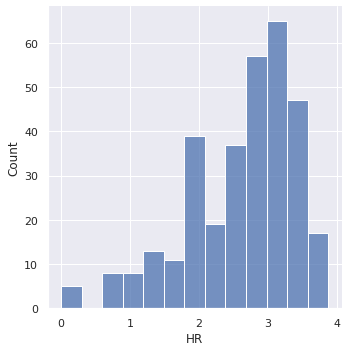

In [119]:
#로그 스케일링 진행
#정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함/데이터 간 편차를 줄여 왜도1(skewness)와 첨도2(Kurtosis)를 줄일 수 있기 때문에 정규성이 높아진다. 

#훈련시 타겟데이터는 X_result 에 따로 저장후 
X_result=np.log1p(X['HR'])
sns.displot(X_result)
#X에서 HR데이터 삭제
X=X.drop(['HR'],axis=1)

print(X_result.head())
print(X.head())

In [120]:
print(X.columns,X.shape)
print(Y.columns,Y.shape)

Index(['R', '2B', 'TB', 'RBI', 'XBH', 'GO/AO', 'GW RBI', 'ISOP', 'XR', 'GPA'], dtype='object') (326, 10)
Index(['  Year', '선수명', '팀명', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'TB', 'RBI', 'SAC', 'SF', 'XBH', 'GO', 'AO', 'GO/AO', 'GW RBI',
       'BB/K', 'P/PA', 'ISOP', 'XR', 'GPA'],
      dtype='object') (53, 26)


In [121]:
#테스트 데이터도 똑같이 없애줘야함 
Y_result=np.log1p(Y['HR'])
Y=Y.drop(['  Year','HR','선수명', '팀명', 'AVG', 'G', 'PA', 'AB','3B',
       'HR','SAC', 'SF','GO', 'AO','BB/K', 'P/PA'],axis=1)



In [122]:
Y=Y.drop(['H'],axis=1)
print(X.columns,X.shape)
print(Y.columns,Y.shape)

Index(['R', '2B', 'TB', 'RBI', 'XBH', 'GO/AO', 'GW RBI', 'ISOP', 'XR', 'GPA'], dtype='object') (326, 10)
Index(['R', '2B', 'TB', 'RBI', 'XBH', 'GO/AO', 'GW RBI', 'ISOP', 'XR', 'GPA'], dtype='object') (53, 10)


In [123]:
#학습용 데이터 =>과거데이터와 예측할해의 데이터 합침
df=pd.concat((X,Y))

df.head()

,R,2B,TB,RBI,XBH,GO/AO,GW RBI,ISOP,XR,GPA
0,99,46,338,144,79,0.77,9,0.276,136.4,0.372
1,94,39,301,136,62,0.86,11,0.204,132.9,0.356
2,98,20,196,41,27,1.10,1,0.082,84.3,0.306
3,97,37,289,101,63,1.01,12,0.219,98.6,0.315
4,84,24,233,90,35,1.17,10,0.112,90.7,0.300


In [124]:
print(df.shape) 
#과거 데이터들의 홈런개수
print(X_result.shape)
#예측 해야할 정답 2022홈런개수
print(Y_result.shape)

(379, 10)
(326,)
(53,)


In [125]:
from scipy.stats import skew

skewness = df.apply(lambda x:skew(x.dropna())).sort_values(ascending=False)

In [126]:
high_skewness=skewness[abs(skewness)>1]
skew_feats=high_skewness.index
print(high_skewness)
print(skew_feats)

GO/AO    3.284661
dtype: float64
Index(['GO/AO'], dtype='object')


In [127]:
df=df.drop(['GO/AO'],axis=1)
print(df.head())

    R  2B   TB  RBI  XBH  GW RBI   ISOP     XR    GPA
0  99  46  338  144   79       9  0.276  136.4  0.372
1  94  39  301  136   62      11  0.204  132.9  0.356
2  98  20  196   41   27       1  0.082   84.3  0.306
3  97  37  289  101   63      12  0.219   98.6  0.315
4  84  24  233   90   35      10  0.112   90.7  0.300


In [128]:
X=X.drop(['GO/AO'],axis=1)
Y=Y.drop(['GO/AO'],axis=1)
print(Y.head())
print(Y.shape)

     R  2B   TB  RBI  XBH  GW RBI   ISOP     XR    GPA
0   85  36  318  113   69      15  0.226  120.2  0.333
1  102  33  317  109   65      12  0.223  114.4  0.326
2   52  18  187   61   29       7  0.123   72.1  0.298
3   53  23  271  101   46       9  0.170   90.5  0.296
4   92  39  286   97   62       9  0.188  110.9  0.308
(53, 9)


In [129]:
X_train=X
X_test=Y

print(X_train.shape)
print(X_test.shape)

(326, 9)
(53, 9)


#**Modeling&Prediction**

In [130]:
#사용 모델
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

In [131]:
#학습전 데이터 스케일링 진행
#중앙값과 IQR 사용하여 아웃라이어의 영향 최소화
from sklearn.preprocessing import RobustScaler


rs=RobustScaler()
rs_Xtrain=rs.fit_transform(X_train) #학습X데이터
rs_Xtest=rs.transform(X_test) #학습 검증 X데이터

print(rs_Xtrain.shape)
print(rs_Xtest.shape)

(326, 9)
(53, 9)


In [132]:
#KFold test

kfold=KFold(n_splits=5)

random_state=42
reg=[]

reg.append(Lasso(random_state=random_state))
reg.append(ElasticNet(random_state=random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state=random_state))

reg_results=[]

for regre in reg:
  reg_results.append(np.mean(np.sqrt(-cross_val_score(regre,rs_Xtrain,y=X_result,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1))))

In [133]:
reg_means=[]
reg_std=[]

for reg_result in reg_results:
  reg_means.append(reg_result.mean())
  reg_std.append(reg_result.std())

In [134]:
#Lasso, ElasticNet, RandomForest, GradientBoosting, XGBoost, LGBM에 대한 교차검증결과
# 평균이 낮을수록 좋음
reg_re=pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.802726,0.0
1,0.802726,0.0
2,0.211254,0.0
3,0.206055,0.0
4,0.209700,0.0
5,0.215040,0.0


In [135]:
# 모델은  RandomForest, GradientBoosting, XGBoost, LGBM 모델사용

In [136]:
GBC=GradientBoostingRegressor()


params={
    'n_estimators':[30,50,100],
    'learning_rate':[0.1,0.01,0.2],
    'max_depth':[3,4,5],
    'min_samples_leaf':[1,5,10],
    'max_features':[0.3,0.2,0.15]
}

grid_GBC=GridSearchCV(GBC,param_grid=params,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1,verbose=1)
#GBC.get_params().keys()
#하이퍼 파라미터 튜닝하는 값을 잘못 넣은줄 알았는데 올바르지않은 파라미터 이름(오타)였음 
grid_GBC.fit(rs_Xtrain,X_result)

print(grid_GBC.best_estimator_)
print(grid_GBC.best_score_)

best_GBC=grid_GBC.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
GradientBoostingRegressor(max_features=0.3, min_samples_leaf=5)
-0.048927348951220265


In [137]:
RF=RandomForestRegressor()

params={
    'n_estimators':[30,50,100],
    'min_samples_leaf':[1,5,10],
    'max_features':[0.3,0.2,0.15],
    'max_depth':[3,4,5]
    
}

grid_RF=GridSearchCV(RF,param_grid=params,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1,verbose=1)
grid_RF.fit(rs_Xtrain,X_result)


print(grid_RF.best_params_)
print(grid_RF.best_estimator_)
print(grid_RF.best_score_)

best_RF=grid_RF.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 1, 'n_estimators': 50}
RandomForestRegressor(max_depth=5, max_features=0.3, n_estimators=50)
-0.07329334893129788


In [138]:
XGB=XGBRegressor()

params={
     'n_estimators':[30,50,100],
     'max_depth':[3,4,5],
     'learning_rate':[0.1,0.01,0.2], #학습 단계별로 이전 결과를 얼마나 반영할지 설정한다. 일반적으로는 0.01 ~ 0.2 사이의 값
     'subsample': [0.6, 0.7, 1.0],# 각 트리마다 데이터 샘플링 비율 over-fitting방지 일반적으로 0.5 ~ 1을 사용
     'colsample_bytree' : [0.3,0.5,0.7],#각 트리마다 feature 샘플링 비율 일반적으로 0.5 ~ 1을 사용한다.
     'scale_pos_weight' : [0.5,1], #데이터가 불균형 할때 사용 보통은 음성 데이터 수 / 양성 데이터 수 값으로 한다.
     'reg_alpha': [0,0.05,0.0005] #규제(Lasso)

}

grid_XGB=GridSearchCV(XGB,param_grid=params,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1,verbose=1)
grid_XGB.fit(rs_Xtrain,X_result)

print(grid_XGB.best_params_)
print(grid_XGB.best_estimator_)
print(grid_XGB.best_score_)

best_XGB=grid_XGB.best_estimator_

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
[06:59:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.05, 'scale_pos_weight': 0.5, 'subsample': 0.6}
XGBRegressor(colsample_bytree=0.7, max_depth=4, reg_alpha=0.05,
             scale_pos_weight=0.5, subsample=0.6)
-0.0415360504978866


In [139]:
LGBM=LGBMRegressor()

params={
    'n_estimators':[30,50,100],
     'max_depth':[3,4,5,10,15],
     'learning_rate':[0.1,0.01,0.2],
     'num_leaves': [10, 30, 50],
     'min_split_gain': [0.1, 0.2, 0.3],

}

grid_LGBM=GridSearchCV(LGBM,param_grid=params,scoring='neg_mean_squared_error',cv=kfold,n_jobs=-1,verbose=1)
grid_LGBM.fit(rs_Xtrain,X_result)

print(grid_LGBM.best_params_)
print(grid_LGBM.best_estimator_)
print(grid_LGBM.best_score_)

best_LGBM=grid_LGBM.best_estimator_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
{'learning_rate': 0.2, 'max_depth': 5, 'min_split_gain': 0.1, 'n_estimators': 30, 'num_leaves': 10}
LGBMRegressor(learning_rate=0.2, max_depth=5, min_split_gain=0.1,
              n_estimators=30, num_leaves=10)
-0.05132059828552343


In [140]:
print(X_result.head())
print(Y_result.head())

0    3.465736
1    3.178054
2    1.386294
3    3.178054
4    2.484907
Name: HR, dtype: float64
0    3.178054
1    3.367296
2    2.397895
3    3.178054
4    3.091042
Name: HR, dtype: float64


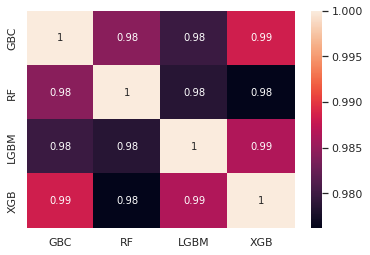

In [141]:
import  seaborn as sns

test_GBC=pd.Series(best_GBC.predict(rs_Xtest),name='GBC')
test_RF=pd.Series(best_RF.predict(rs_Xtest),name='RF')
test_LGBM=pd.Series(best_LGBM.predict(rs_Xtest),name='LGBM')
test_XGB=pd.Series(best_XGB.predict(rs_Xtest),name='XGB')

ensemble_result=pd.concat([test_GBC,test_RF,test_LGBM,test_XGB],axis=1)
g=sns.heatmap(ensemble_result.corr(),annot=True)

In [142]:
#앙상블기법 예측모델
from sklearn.metrics import r2_score

ensemble=np.expm1(0.8*test_XGB+0.1*test_GBC+0.1*test_LGBM)
name=['이정후','피렐라','박건우','이대호','나성범','김혜성','문보경','소크라테스','페르난데스','조용호','한동희','전준우','최지훈','박성한','마티니','채은성','박해민','허경민','터크먼','김선빈','김현수','홍창기','안치홍','양의지','노시환','노진혁','손아섭','푸이그','박병호','류지혁','정은원','박찬호','오지환','오재일','이지영','박민우','배정대','최정','최형우','한유섬','강승호','황재균','정수빈','추신수','하주석','황대인','유강남','김재환','송성문','양석환','박동원','김태연','심우준']
Y_result1=np.exp(Y_result)-1

print('R2 Score:',r2_score(Y_result1,ensemble))

prediction=pd.DataFrame(
    {   
        'name':name,
        'predict_HR':ensemble,
        'real_HR':Y_result1
    }
)
print(prediction.head())
prediction.to_csv('ensenmble_result.csv',index=False,encoding='CP949')


R2 Score: 0.9543960732218922
  name  predict_HR  real_HR
0  이정후   27.063204     23.0
1  피렐라   27.395074     28.0
2  박건우    9.465590     10.0
3  이대호   19.650853     23.0
4  나성범   20.777943     21.0


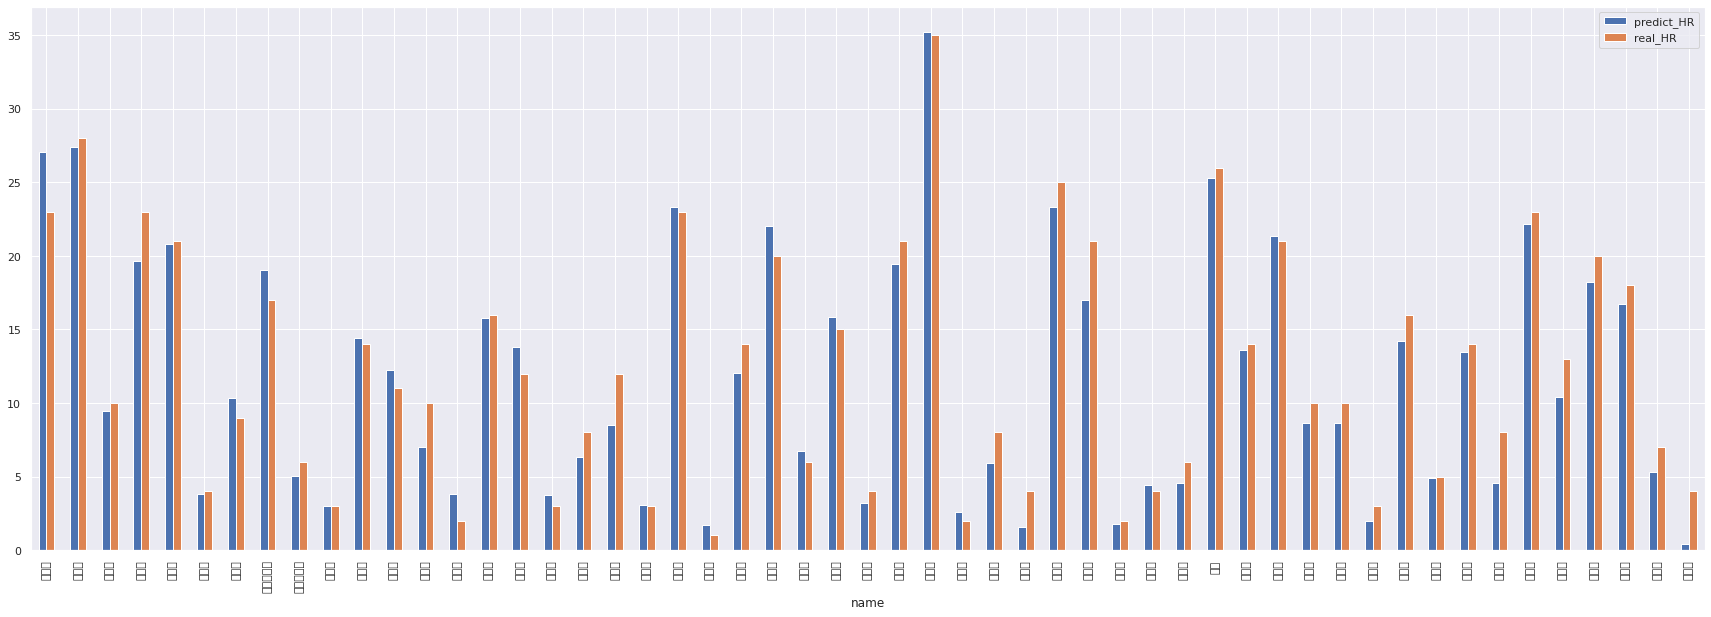

In [143]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

import warnings
warnings.filterwarnings(action='ignore')


prediction.plot(figsize=(30,10),x='name',y=['predict_HR','real_HR'],kind='bar')

In [144]:
#보팅 기법 예측모델

from sklearn.ensemble import VotingRegressor

voting=VotingRegressor(estimators=[('XGB',best_XGB),('LGBM',best_LGBM),('GBC',best_GBC)],n_jobs=-1)
#RF 제외한게 점수 더 좋게 나왔음 
voting.fit(rs_Xtrain,X_result)

voting_result=pd.Series(voting.predict(rs_Xtest))
voting_result=np.exp(voting_result)-1

print('R2 Score:',r2_score(Y_result1,voting_result))

prediction_voting=pd.DataFrame({
    'name':name,
    'predict_HR':voting_result,
    'real_HR':Y_result1
})

print(prediction_voting.head())
prediction_voting.to_csv('voting_result.csv',index=False,encoding='CP949')




R2 Score: 0.9511099444098302
  name  predict_HR  real_HR
0  이정후   27.902569     23.0
1  피렐라   27.978091     28.0
2  박건우    9.397073     10.0
3  이대호   20.250977     23.0
4  나성범   20.860396     21.0


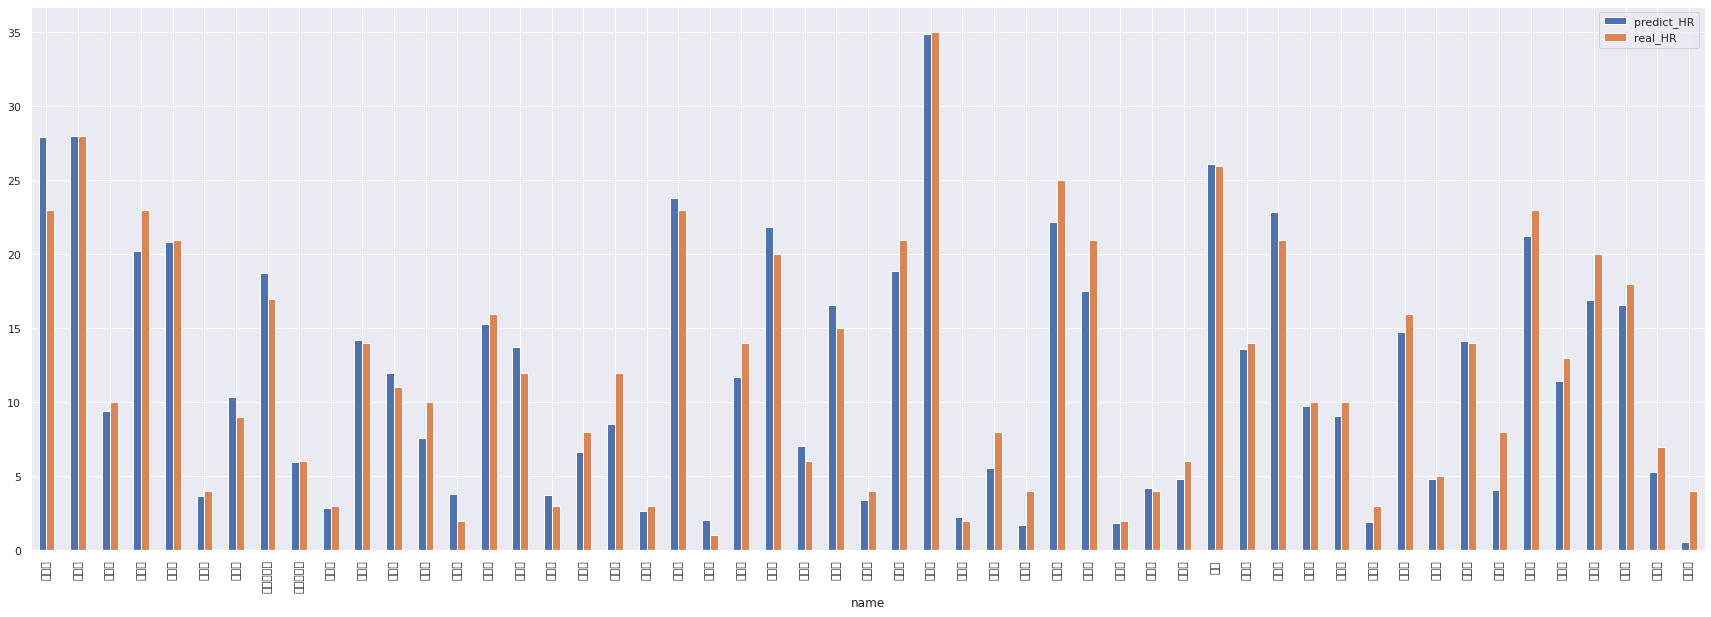

In [145]:
prediction_voting.plot(figsize=(30,10),x='name',y=['predict_HR','real_HR'],kind='bar')

In [146]:
#스태킹 기법 예측모델
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression

params={
    'meta_regressor':[0.1,1.0,10.0,100.0],
    'use_features_in_secondary':[True,False]

}

clf1=best_XGB
clf2=best_LGBM
clf3=best_GBC

lr=LogisticRegression()
stacking_result=StackingRegressor(regressors=[clf1,clf2,clf3],meta_regressor=RandomForestRegressor())
stacking_mod=stacking_result.fit(rs_Xtrain,X_result)
stacking_pred=stacking_mod.predict(rs_Xtest)

stacking_pred=np.exp(stacking_pred)-1
print('R2 Score:',r2_score(Y_result1,stacking_pred))

prediction_stacking=pd.DataFrame({
    'name':name,
    'predict_HR':stacking_pred,
    'real_HR':Y_result1
})

prediction_voting.head()

[06:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.9457375761972564


,name,predict_HR,real_HR
0,이정후,27.902569,23.0
1,피렐라,27.978091,28.0
2,박건우,9.397073,10.0
3,이대호,20.250977,23.0
4,나성범,20.860396,21.0


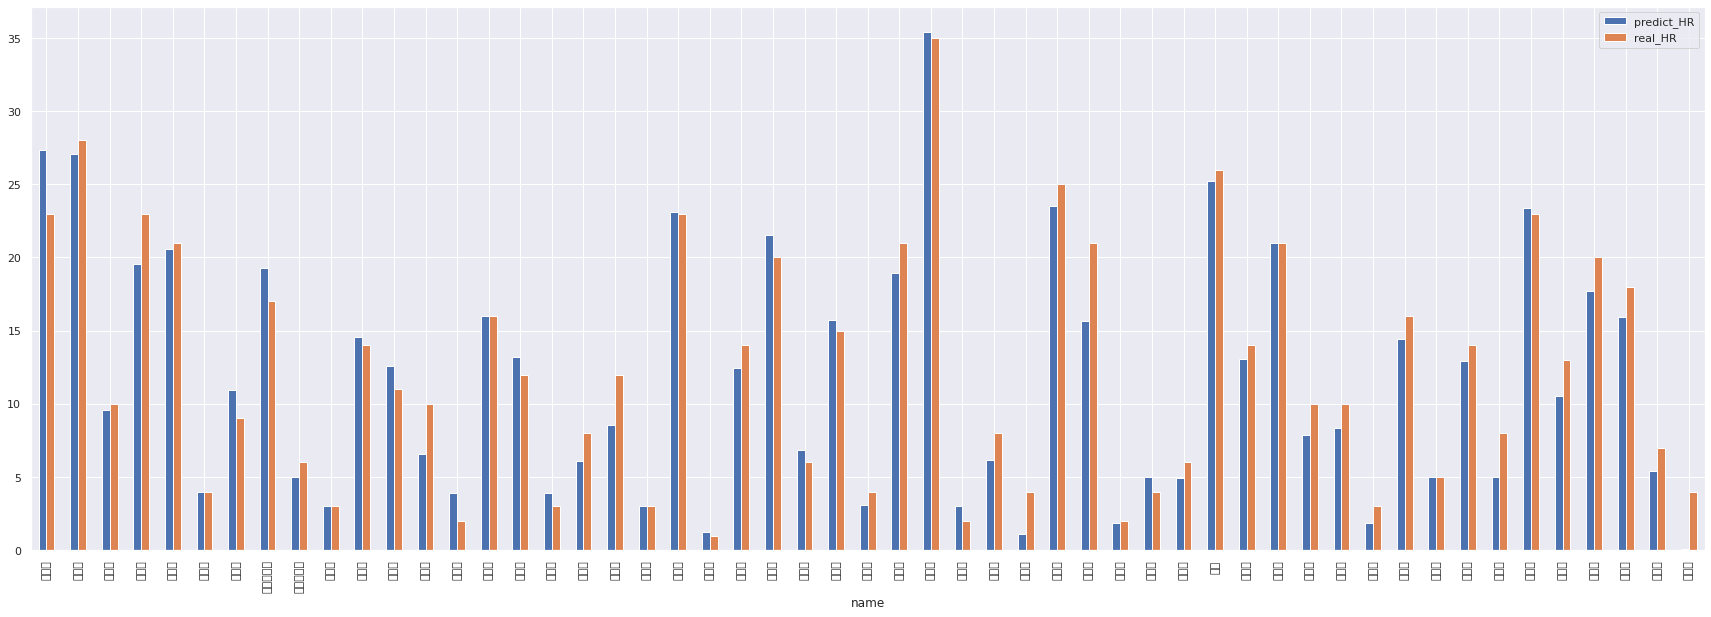

In [147]:
prediction_stacking.plot(figsize=(30,10),x='name',y=['predict_HR','real_HR'],kind='bar')

In [148]:
#예측 홈런순위 실제 홈런 10위중 7명 10위안에 들어가있음
print(prediction.sort_values(by='predict_HR',axis=0,ascending=False))

     name  predict_HR  real_HR
28    박병호   35.185489     35.0
1     피렐라   27.395074     28.0
0     이정후   27.063204     23.0
37     최정   25.308485     26.0
32    오지환   23.307442     25.0
20    김현수   23.306888     23.0
47    김재환   22.179152     23.0
23    양의지   22.051175     20.0
39    한유섬   21.362018     21.0
4     나성범   20.777943     21.0
3     이대호   19.650853     23.0
27    푸이그   19.481941     21.0
7   소크라테스   19.023981     17.0
49    양석환   18.197822     20.0
33    오재일   17.029352     21.0
50    박동원   16.697585     18.0
25    노진혁   15.867917     15.0
14    마티니   15.791297     16.0
10    한동희   14.399883     14.0
43    추신수   14.236141     16.0
15    채은성   13.775155     12.0
38    최형우   13.621208     14.0
45    황대인   13.495308     14.0
11    전준우   12.239835     11.0
22    안치홍   12.074662     14.0
48    송성문   10.423918     13.0
6     문보경   10.335662      9.0
2     박건우    9.465590     10.0
40    강승호    8.662139     10.0
41    황재균    8.625970     10.0
18    터크먼    8.490267     12.0
12    최지